In [1]:
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
# %matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
# %matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%time
import sys
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date
import pyicon as pyic
import cartopy.crs as ccrs
import glob, os
import xarray as xr
import pandas as pd
import cartopy
from dask.distributed import Client, LocalCluster
# import seawater as sw

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots
CPU times: user 1.38 s, sys: 986 ms, total: 2.37 s
Wall time: 3.13 s


In [3]:
run = 'exp.ocean_era51h_zstar_r2b9_21223-DWS'
path_data = f'/work/bm1102/m211054/dyamond/zstar2/experiments/{run}/outdata/'

In [4]:
# path_scratch = '/scratch/m/m300602/dymwin/'
path_scratch = f'/mnt/lustre02/work/bm1102/m300602/proj_dw/{run}/'

In [5]:
mstr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [6]:
# mfdset_kwargs = dict(combine='nested', concat_dim='time', 
#                      chunks=dict(time=1, depth=None),
#                     )
mfdset_kwargs = dict(combine='nested', concat_dim='time', 
                     data_vars='minimal', coords='minimal', compat='override', join='override',
                    )

In [7]:
l_derive_data = False

In [8]:
# fpath_fx = '/pool/data/ICON/oes/input/r0004/OceanOnly_IcosSymmetric_4932m_rotatedZ37d_modified_srtm30_1min/dyamond-winter_R2B9L128_fx.nc'
fpath_fx = '/pool/data/ICON/oes/input/r0004/OceanOnly_IcosSymmetric_4932m_rotatedZ37d_modified_srtm30_1min/ZSTAR/R2B9L128_fx.nc'
ds_fx = xr.open_mfdataset(fpath_fx, **mfdset_kwargs, chunks=dict(time=1, depth=1, depth_2=1))
depth = ds_fx.depth.compute().data

In [9]:
fpath_ckdtree = '/home/mpim/m300602/work/icon/grids/r2b9_oce_r0004/ckdtree/rectgrids/r2b9_oce_r0004_res0.30_180W-180E_90S-90N.npz'

In [10]:
ddnpz = np.load(fpath_ckdtree)
lon, lat = ddnpz['lon'], ddnpz['lat']

In [11]:
path_fig = f'/home/mpim/m300602/proj_dymwin/html/{run}/pics/'
thisscriptname = 'r2b9_dymwin_spinup'
do_save_fig = True

In [12]:
def save_fig(fpath, dpi=None):
    if do_save_fig:
        print(f'Saving {fpath}')
        plt.savefig(fpath, dpi=dpi)
    return

## Load and interpolate ICON data

In [13]:
client.shutdown()

NameError: name 'client' is not defined

In [13]:
cluster = LocalCluster(#ip=\"0.0.0.0\",
                       silence_logs=50,
                       n_workers=4,
                       threads_per_worker=1,
                       memory_limit='8G',
)
client = Client(cluster)

In [14]:
client

<Client: 'tcp://127.0.0.1:43750' processes=4 threads=4, memory=29.80 GiB>

In [15]:
tave_int = ['2016-02-01', '2017-01-01']

In [16]:
%%time
ds_3d = xr.open_mfdataset(f'{path_data}{run}_P1M_3d_*.nc', **mfdset_kwargs, chunks=dict(time=1, depth=1, depth_2=1))
ds_3d = ds_3d.sel(time=slice(*tave_int))

CPU times: user 3.19 s, sys: 602 ms, total: 3.8 s
Wall time: 8.64 s


In [17]:
ds_3d.time.data

array(['2016-02-01T00:00:00.000000000', '2016-03-01T00:00:00.000000000',
       '2016-04-01T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2016-06-01T00:00:00.000000000', '2016-07-01T00:00:00.000000000',
       '2016-08-01T00:00:00.000000000', '2016-09-01T00:00:00.000000000',
       '2016-10-01T00:00:00.000000000', '2016-11-01T00:00:00.000000000',
       '2016-12-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [18]:
%%time
ds_2d = xr.open_mfdataset(f'{path_data}{run}_P1M_2d_*.nc', **mfdset_kwargs, chunks=dict(time=1))
ds_2d = ds_2d.sel(time=slice(*tave_int))

CPU times: user 3.83 s, sys: 608 ms, total: 4.44 s
Wall time: 8.07 s


In [19]:
fpath_ckdtree_nc = '/home/mpim/m300602/work/icon/grids/r2b9_oce_r0004/ckdtree/rectgrids/r2b9_oce_r0004_res0.30_180W-180E_90S-90N.nc'

In [20]:
ds_ckdt = xr.open_dataset(fpath_ckdtree_nc).compute()
ds_ckdt

<xarray.Dataset>
Dimensions:     (lat: 600, lon: 1200)
Coordinates:
  * lat         (lat) float64 -90.0 -89.7 -89.4 -89.1 ... 88.8 89.1 89.4 89.7
  * lon         (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7
Data variables:
    dckdtree_c  (lat, lon) float64 1.271e+06 1.271e+06 ... 1.413e+03 1.586e+03
    ickdtree_c  (lat, lon) int64 12841836 12841836 12841836 ... 366344 366344
    dckdtree_e  (lat, lon) float64 1.27e+06 1.27e+06 1.27e+06 ... 954.2 785.8
    ickdtree_e  (lat, lon) int64 19308644 19308644 19308644 ... 555132 555132
    dckdtree_v  (lat, lon) float64 1.267e+06 1.267e+06 ... 2.981e+03 2.927e+03
    ickdtree_v  (lat, lon) int64 6464982 6464982 6464982 ... 188615 188615

In [21]:
inds_xr = ds_ckdt.ickdtree_c.compute()
inds_np = ds_ckdt.ickdtree_c.compute().data.flatten()
lon, lat = ds_ckdt.lon.data, ds_ckdt.lat.data
inds_np.shape, inds_xr

((720000,),
 <xarray.DataArray 'ickdtree_c' (lat: 600, lon: 1200)>
 array([[12841836, 12841836, 12841836, ..., 12841836, 12841836, 12841836],
        [12841836, 12841836, 12841836, ..., 12841836, 12841836, 12841836],
        [12841836, 12841836, 12841836, ..., 12841836, 12841836, 12841836],
        ...,
        [  366165,   366165,   366165, ...,   366165,   366165,   366165],
        [  366303,   366303,   366303, ...,   366303,   366303,   366303],
        [  366344,   366344,   366344, ...,   366344,   366344,   366344]])
 Coordinates:
   * lat      (lat) float64 -90.0 -89.7 -89.4 -89.1 -88.8 ... 88.8 89.1 89.4 89.7
   * lon      (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7)

In [72]:
%%time
arr = ds_3d.to[:, :, :]

CPU times: user 1e+03 µs, sys: 0 ns, total: 1e+03 µs
Wall time: 1.33 ms


In [73]:
%%time
arr_i = pyic.interp_to_rectgrid_xr(arr, fpath_ckdtree_nc, mask_out_of_range=False, mask_out_of_range_before=True)

/work/mh0033/m300602/miniconda3/envs/pyicon_py39/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


CPU times: user 1min 12s, sys: 37.6 s, total: 1min 50s
Wall time: 6min 4s


In [74]:
%%time
arr_i = pyic.interp_to_rectgrid_xr(arr, fpath_ckdtree_nc, mask_out_of_range=True, mask_out_of_range_before=False)

/work/mh0033/m300602/miniconda3/envs/pyicon_py39/lib/python3.9/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


CPU times: user 57.6 s, sys: 34.5 s, total: 1min 32s
Wall time: 5min 23s


In [75]:
# %%time
# arr_xr_simple = arr.isel(ncells=inds_xr).compute()

In [76]:
%%time
arr_xr = arr.isel(ncells=inds_np)
arr_xr = arr_xr.assign_coords(ncells=
                               pd.MultiIndex.from_product([lat, lon], names=("lat", "lon"))
                              ).unstack()
arr_xr = arr_xr.compute()
radius_of_influence=1000e3
arr_xr = arr_xr.where(ds_ckdt.dckdtree_c<radius_of_influence)

CPU times: user 57 s, sys: 34.8 s, total: 1min 31s
Wall time: 5min 14s


In [77]:
%%time
arr_interp = interp_to_rectgrid_xr(arr, fpath_ckdtree_nc)

CPU times: user 53.9 s, sys: 34.8 s, total: 1min 28s
Wall time: 4min 51s


In [67]:
def interp_to_rectgrid_xr(arr, fpath_ckdtree,
                          lon_reg=None, lat_reg=None,
                          coordinates='clat clon',
                          radius_of_influence=1000e3,
                          compute=True,
                          mask_out_of_range=True,
                          mask_out_of_range_before=False,
                         ):

  # --- load interpolation indices
  ds_ckdt = xr.open_dataset(fpath_ckdtree)
  if ('clon' in coordinates) or (coordinates==''):
    inds = ds_ckdt.ickdtree_c
    dist = ds_ckdt.dckdtree_c
  elif 'elon' in coordinates:
    inds = ds_ckdt.ickdtree_e
    dist = ds_ckdt.dckdtree_e
  elif 'vlon' in coordinates:
    inds = ds_ckdt.ickdtree_v
    dist = ds_ckdt.dckdtree_v
  else:
    raise ValueError('::: Error: Unsupported coordinates: %s! ::: ' % (coordinates))
  dist = dist.compute()
  inds = inds.compute().data.flatten()
  lon = ds_ckdt.lon.compute().data
  lat = ds_ckdt.lat.compute().data

  # --- interpolate by nearest neighbor
  arr_interp = arr.isel(ncells=inds)

  # --- reshape
  arr_interp = arr_interp.assign_coords(ncells=pd.MultiIndex.from_product([lat, lon], names=("lat", "lon"))
                                ).unstack()

  # --- mask values where nearest neighbor is too far away
  # (doing this after compute seems to be faster) FIXME check that!
  if mask_out_of_range_before:
    arr_interp = arr_interp.where(dist<radius_of_influence)
  
  # --- compute data otherwise a lazy object is returned
  if compute:
    arr_interp = arr_interp.compute()

  # --- mask values where nearest neighbor is too far away
  # (doing this after compute seems to be faster) FIXME check that!
  if mask_out_of_range:
    arr_interp = arr_interp.where(dist<radius_of_influence)

  return  arr_interp

In [63]:
%%time
fpath_ckdtree = fpath_ckdtree_nc
coordinates = 'clat, clon'
compute = True
mask_out_of_range = False
mask_out_of_range_before = True
# if True:
def interp_to_rectgrid_xr(arr, fpath_ckdtree,
                          lon_reg=None, lat_reg=None,
                          coordinates='clat clon',
                          radius_of_influence=1000e3,
                          compute=True,
                          mask_out_of_range=True,
                          mask_out_of_range_before=False,
                         ):
  # --- load interpolation indices
  ds_ckdt = xr.open_dataset(fpath_ckdtree)
  if ('clon' in coordinates) or (coordinates==''):
    inds = ds_ckdt.ickdtree_c
    dist = ds_ckdt.dckdtree_c
  elif 'elon' in coordinates:
    inds = ds_ckdt.ickdtree_e
    dist = ds_ckdt.dckdtree_e
  elif 'vlon' in coordinates:
    inds = ds_ckdt.ickdtree_v
    dist = ds_ckdt.dckdtree_v
  else:
    raise ValueError('::: Error: Unsupported coordinates: %s! ::: ' % (coordinates))
  dist = dist.compute()
  inds = inds.compute().data.flatten()
  lon = ds_ckdt.lon.compute().data
  lat = ds_ckdt.lat.compute().data

  # --- interpolate by nearest neighbor
  arr_interp = arr.isel(ncells=inds)

  # --- reshape
  arr_interp = arr_interp.assign_coords(ncells=pd.MultiIndex.from_product([lat, lon], names=("lat", "lon"))
                                ).unstack()
    
# --- mask values where nearest neighbor is too far away
  # (doing this after compute seems to be faster) FIXME check that!
  if mask_out_of_range_before:
    arr_interp = arr_interp.where(dist<radius_of_influence)

  # --- compute data otherwise a lazy object is returned
  if compute:
    arr_interp = arr_interp.compute()

  # --- mask values where nearest neighbor is too far away
  # (doing this after compute seems to be faster) FIXME check that!
  if mask_out_of_range:
    arr_interp = arr_interp.where(dist<radius_of_influence)
  return arr_interp

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 17.2 µs


<IPython.core.display.Javascript object>


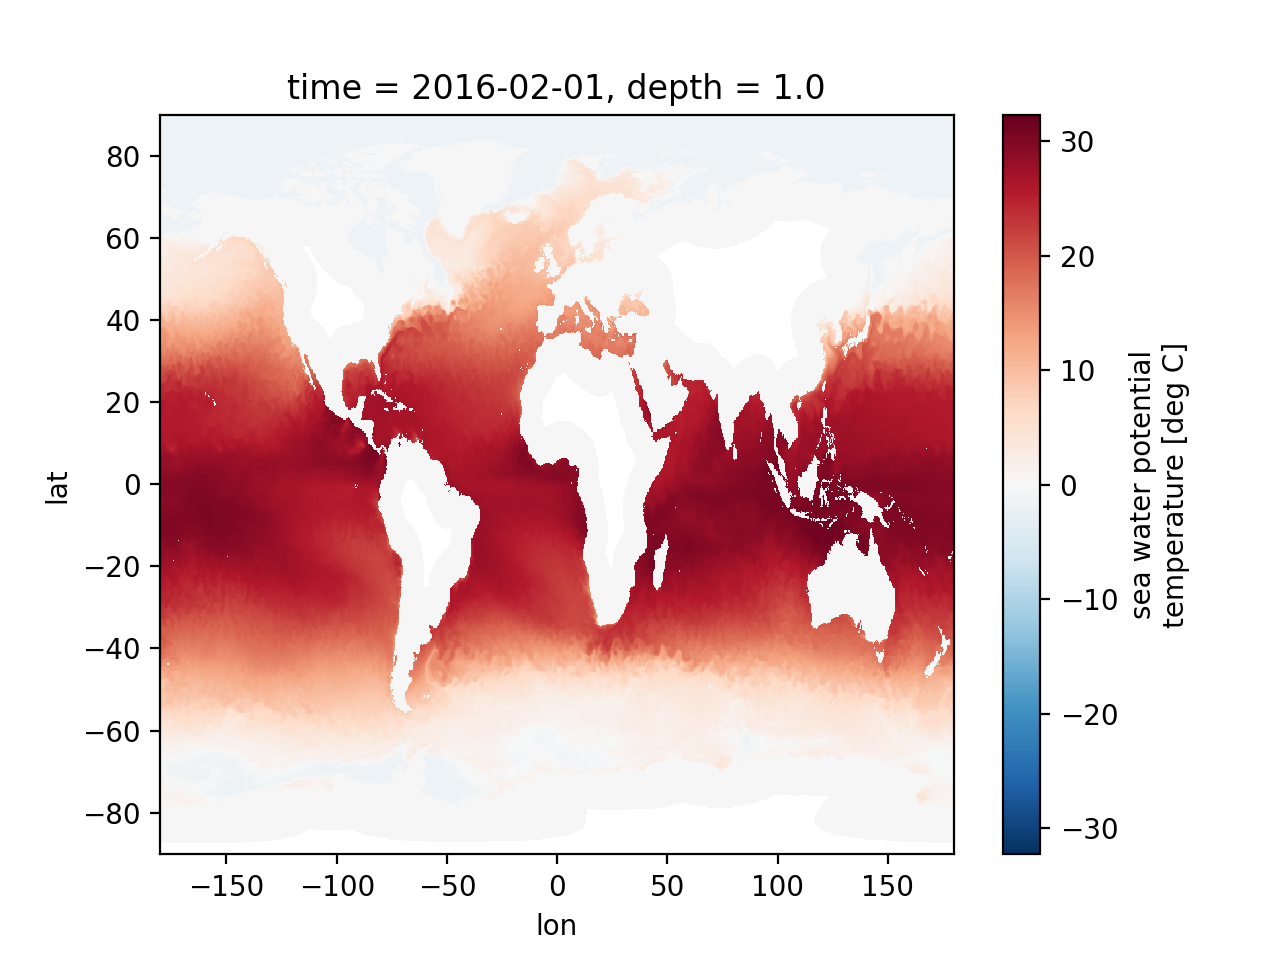

In [29]:
fig = plt.figure()
arr_xr.isel(depth=0,time=0).plot()

Load all into memory and do indexing afterwards

In [68]:
%%time
arr_xr_ixr = arr.compute().isel(ncells=inds_xr)

KilledWorker: ('open_dataset-a13a8d071f6acfd1218445866af32999to-ce8712418851f3454a705db534c5fe08', <WorkerState 'tcp://127.0.0.1:44438', name: 1, memory: 0, processing: 4>)

In [53]:
%%time
arr_xr_first_compute = arr.compute().isel(ncells=inds_np)
arr_xr_first_compute = arr_xr_first_compute.assign_coords(ncells=
                               pd.MultiIndex.from_product([lat, lon], names=("lat", "lon"))
                              ).unstack()

CPU times: user 3.72 s, sys: 9.24 s, total: 13 s
Wall time: 15.3 s


In [54]:
%%time
arr_np = arr.compute().data[:,:,inds_np]
arr_np = xr.DataArray(arr_np, dims=arr.dims)
arr_np = arr_np.assign_coords(ncells=
                               pd.MultiIndex.from_product([lat, lon], names=("lat", "lon"))
                              ).unstack()

CPU times: user 3.63 s, sys: 8.37 s, total: 12 s
Wall time: 14.4 s


In [55]:
arr_xr_ixr.shape, arr_xr_first_compute.shape, arr_np.shape

((12, 4, 600, 1200), (12, 4, 600, 1200), (12, 4, 600, 1200))

In [56]:
np.array_equal(arr_xr_ixr, arr_np)

True

In [57]:
np.array_equal(arr_xr_ixr, arr_xr_first_compute)

True

In [58]:
np.array_equal(arr_xr_ixr, arr_np)

True

<IPython.core.display.Javascript object>


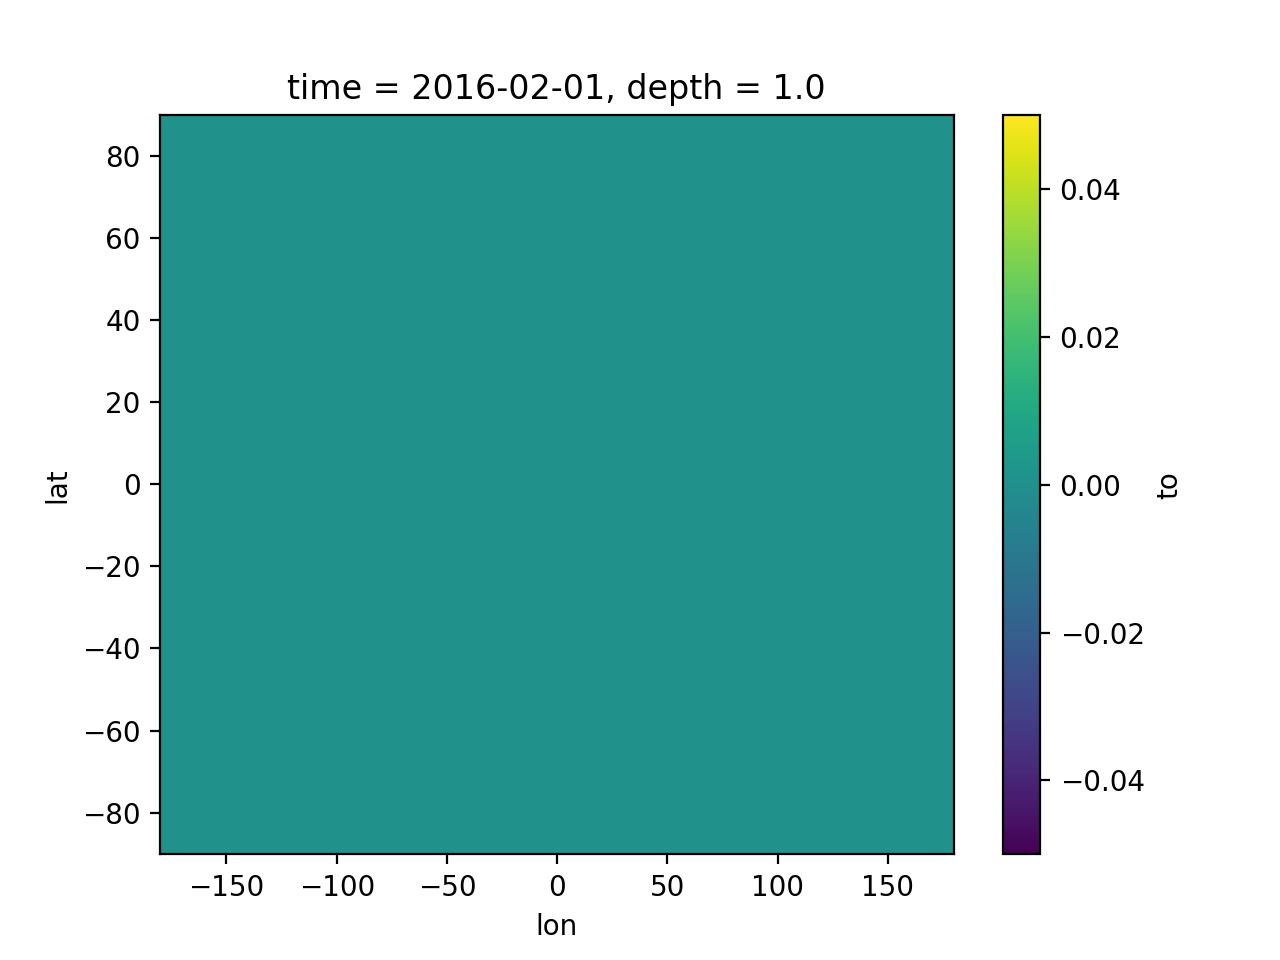

In [63]:
fig = plt.figure()
(arr_xr.isel(depth=0, time=0)-arr_xr_ixr.isel(depth=0,time=0)).plot()

In [59]:
arr_np.shape

(12, 4, 600, 1200)

In [111]:
datai.unstack?

In [112]:
datai.resample?

In [120]:
%%time
lon, lat, toi = pyic.interp_to_rectgrid(to_sel, fpath_ckdtree)

CPU times: user 1.37 s, sys: 655 ms, total: 2.03 s
Wall time: 1.91 s


In [100]:
datai

<xarray.DataArray 'to' (depth: 3, lat: 600, lon: 1200)>
array([[[ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        ...,
        [-1.7999687, -1.7999687, -1.7999687, ..., -1.7999687,
         -1.7999687, -1.7999687],
        [-1.7999773, -1.7999773, -1.7999773, ..., -1.7999773,
         -1.7999773, -1.7999773],
        [-1.7999729, -1.7999729, -1.7999729, ..., -1.7999729,
         -1.7999729, -1.7999729]],

       [[ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
...
        [-1.7995262, -1.7995262, -1.7995262, ..., -1.7995262,
         -1.7995262, -1.7995262],
        [-1.7996492, -1.7996492, -1.7996492, ..., -1.7996492,
         -1.7996492, -1.7996492],
        [-1.799591 , -1.799591 , -1.799591 , ..., -1.799591 ,
         -1.799591 , -1.799591 ]],

       [[ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        ...,
        [-1.7992737, -1.7992737, -1.7992737, ..., -1.7992737,
         -1.7992737, -1.7992737],
        [-1.7994561, -1.7994561, -1.7994561, ..., -1.7994561,
         -1.7994561, -1.7994561],
        [-1.7993708, -1.7993708, -1.7993708, ..., -1.7993708,
         -1.7993708, -1.7993708]]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2016-02-01
    clon     (lat, lon) float32 -2.879 -2.879 -2.879 ... 3.089 3.089 3.089
    clat     (lat, lon) float32 -1.371 -1.371 -1.371 ... 1.566 1.566 1.566
  * depth    (depth) float64 1.0 3.05 5.2
  * lat      (lat) float64 -90.0 -89.7 -89.4 -89.1 -88.8 ... 88.8 89.1 89.4 89.7
  * lon      (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7
Attributes:
    standard_name:                sea_water_potential_temperature
    long_name:                    sea water potential temperature
    units:                        deg C
    code:                         2
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [59]:
%%time
tmean = ds_3d.to[:,:10,:].mean(dim='time').compute()

CPU times: user 41.3 s, sys: 49.5 s, total: 1min 30s
Wall time: 39.8 s


In [56]:
client.shutdown()

In [55]:
%%time
lon, lat, toi = pyic.interp_to_rectgrid(ds_3d.to, fpath_ckdtree)

UnboundLocalError: local variable 'data_interpolated' referenced before assignment

In [35]:
a = to_sel.sum(dim='depth')

In [ ]:
lon, lat, ds_icon[f'{var}i'][ll, kk,:,:] = pyic.interp_to_rectgrid(ds_3d[var][ll,kk,:], fpath_ckdtree)

In [38]:
%%time

if l_derive_data:  # 1h32min
# if True:
    for var in ['to', 'so', 'u', 'v']:
        ds_icon = xr.Dataset()
        ds_icon[f'{var}i'] = xr.DataArray(np.ma.zeros((12, 128, 600, 1200)), dims=['month', 'depth', 'lat', 'lon'], 
                                 coords=dict(month=np.arange(1,13), depth=depth, lat=lat, lon=lon))
        for ll in range(12):
            for kk in range(depth.size):
                print(f'var = {var}, ll = {ll}, kk = {kk}', end='\r')
                lon, lat, ds_icon[f'{var}i'][ll, kk,:,:] = pyic.interp_to_rectgrid(ds_3d[var][ll,kk,:], fpath_ckdtree)
        fpath_icon = f'{path_scratch}/dymwin_bias_plots_interp_icon_{var}.nc'
        print(f'Saving {fpath_icon}')
        ds_icon.to_netcdf(fpath_icon)
else:
    flist = []
    for var in ['to', 'so', 'u', 'v']:
        flist.append(f'{path_scratch}/dymwin_bias_plots_interp_icon_{var}.nc')
    print(f'Loading {flist}')
    ds_icon = xr.open_mfdataset(flist, **mfdset_kwargs)

Loading ['/mnt/lustre02/work/bm1102/m300602/proj_dw/exp.ocean_era51h_zstar_r2b9_21223-DWS//dymwin_bias_plots_interp_icon_to.nc', '/mnt/lustre02/work/bm1102/m300602/proj_dw/exp.ocean_era51h_zstar_r2b9_21223-DWS//dymwin_bias_plots_interp_icon_so.nc', '/mnt/lustre02/work/bm1102/m300602/proj_dw/exp.ocean_era51h_zstar_r2b9_21223-DWS//dymwin_bias_plots_interp_icon_u.nc', '/mnt/lustre02/work/bm1102/m300602/proj_dw/exp.ocean_era51h_zstar_r2b9_21223-DWS//dymwin_bias_plots_interp_icon_v.nc']
CPU times: user 19 ms, sys: 13 ms, total: 32 ms
Wall time: 32.8 ms


In [20]:
ds_icon['depth'] = depth

In [21]:
%%time
lon, lat, basin_ci = pyic.interp_to_rectgrid(ds_fx.basin_c, fpath_ckdtree=fpath_ckdtree)
ds_icon['basin_ci'] = xr.DataArray(basin_ci, dims=['lat', 'lon'])

CPU times: user 571 ms, sys: 211 ms, total: 782 ms
Wall time: 1.63 s


In [22]:
!ls /mnt/lustre02/work/bm1102/m300602/proj_dw/pp/

ls: cannot access /mnt/lustre02/work/bm1102/m300602/proj_dw/pp/: No such file or directory


## Do calculations

In [90]:
%%time

toi = ds_icon['toi'][0,1,:,:].compute()#.data
soi = ds_icon['soi'][0,1,:,:].compute()#.data

toi_bias = (ds_icon['toi'][0,1,:,:] - (ds_ref['to_ref'][0,1,:,:])).compute()#.data
soi_bias = (ds_icon['soi'][0,1,:,:] - (ds_ref['so_ref'][0,1,:,:])).compute()#.data

CPU times: user 66 ms, sys: 49 ms, total: 115 ms
Wall time: 291 ms


In [43]:
ds_icon.toi[0,:,:,:].max().compute()#, ds_ref.to_ref[0,:,:,:].max()

<xarray.DataArray 'toi' ()>
array(32.8291626)
Coordinates:
    month    int64 1

In [36]:
%%time

fpath_icon_02 = f'{path_scratch}/dymwin_bias_plots_interp_icon_02.nc'
if l_derive_data: # 5min 12sec
# if True:
    print('bias')
    ds_icon['tbias'] = ds_icon['toi'] - ds_ref['to_ref']
    ds_icon['sbias'] = ds_icon['soi'] - ds_ref['so_ref']

    print('bias_zave')
    ds_icon['tbias_zave'] = ds_icon['tbias'].mean(dim='lon')
    ds_icon['sbias_zave'] = ds_icon['sbias'].mean(dim='lon')

    print('zave')
    ds_icon['to_zave'] = ds_icon['toi'].mean(dim='lon')
    ds_icon['so_zave'] = ds_icon['soi'].mean(dim='lon')
    ds_icon['uo_zave'] = ds_icon['ui'].mean(dim='lon')

    print('different basin biases')
    data = ds_icon['tbias'].to_masked_array()
    data[:, :, basin_ci!=1] = np.ma.masked
    ds_icon['tbias_azave'] = xr.DataArray(data.mean(axis=3), dims=['time', 'depth', 'lat'])

    data = ds_icon['tbias'].to_masked_array()
    data[:, :, (basin_ci!=3)&(basin_ci!=7)] = np.ma.masked
    ds_icon['tbias_ipzave'] = xr.DataArray(data.mean(axis=3), dims=['time', 'depth', 'lat'])

    data = ds_icon['sbias'].to_masked_array()
    data[:, :, basin_ci!=1] = np.ma.masked
    ds_icon['sbias_azave'] = xr.DataArray(data.mean(axis=3), dims=['time', 'depth', 'lat'])

    data = ds_icon['sbias'].to_masked_array()
    data[:, :, (basin_ci!=3)&(basin_ci!=7)] = np.ma.masked
    ds_icon['sbias_ipzave'] = xr.DataArray(data.mean(axis=3), dims=['time', 'depth', 'lat'])
    
    print(f'Saving {fpath_icon_02}')
    ds_icon.to_netcdf(fpath_icon_02)
else:
    print(f'Saving {fpath_icon_02}')
    ds_icon = xr.open_dataset(fpath_icon_02)

Saving /mnt/lustre02/work/bm1102/m300602/proj_dw/exp.ocean_era51h_zstar_r2b9_21223-DWS//dymwin_bias_plots_interp_icon_02.nc
CPU times: user 8 ms, sys: 3 ms, total: 11 ms
Wall time: 9.74 ms


In [26]:
ds_2d = xr.open_mfdataset(f'{path_data}{run}_P1M_2d_*.nc', **mfdset_kwargs, chunks=dict(time=1))
ds_2d = ds_2d.sel(time=slice(*tave_int))

In [27]:
%%time
for var in ['zos', 'conc', 'hi']:
    ds_icon[f'{var}i'] = xr.DataArray(np.ma.zeros((12, 600, 1200)), dims=['month', 'lat', 'lon'], 
                             coords=dict(month=np.arange(1,13), lat=lat, lon=lon))
    for ll in range(12):
        print(f'var = {var}, ll = {ll}', end='\r')
#         fname = f'pp_dymwin_time_ave_{var}_{ll+1:02d}.nc'
#         fpath_data = f'/work/bm1102/m211054/dyamond/zstar2/experiments/exp.ocean_era51h_zstar_r2b9_21182-DYW/outdata/{fname}'
# #         fpath_data = f'{path_scratch}/{fname}'
#         print(fpath_data, end='\r')
#         ds = xr.open_mfdataset(fpath_data, **mfdset_kwargs, chunks=dict(depth=1))
        if var in ['zos']:
            lon, lat, ds_icon[f'{var}i'][ll,:,:] = pyic.interp_to_rectgrid(ds_2d[var][ll,:], fpath_ckdtree)
        else:
            lon, lat, ds_icon[f'{var}i'][ll,:,:] = pyic.interp_to_rectgrid(ds_2d[var][ll,0,:], fpath_ckdtree)

CPU times: user 19.9 s, sys: 7.14 s, total: 27 s
Wall time: 29.2 s


In [28]:
%%time
fpath_icon_02 = f'{path_scratch}/dymwin_bias_plots_interp_icon_02.nc'

if l_derive_data:
# if True:
    print(f'Saving {fpath_icon_02}')
    ds_icon.to_netcdf(fpath_icon_02)
else:
    print(f'Loading {fpath_icon_02}')
    ds_icon = xr.open_dataset(fpath_icon_02)

Loading /mnt/lustre02/work/bm1102/m300602/proj_dw/exp.ocean_era51h_zstar_r2b9_21223-DWS//dymwin_bias_plots_interp_icon_02.nc
CPU times: user 8 ms, sys: 16 ms, total: 24 ms
Wall time: 21.8 ms


In [29]:
# import seawater as sw
# %%time
# ds_icon['pdensi'] = sw.dens(ds_icon['soi'], ds_icon['soi'], 0) - 1000.
# ds_icon['pdens_zave'] = ds_icon['pdensi'].mean(dim='lon')

In [30]:
ds_icon

<xarray.Dataset>
Dimensions:       (depth: 128, lat: 600, lon: 1200, month: 12, time: 12)
Coordinates:
  * depth         (depth) float64 1.0 3.05 5.2 ... 5.522e+03 5.71e+03 5.904e+03
  * lat           (lat) float64 -90.0 -89.7 -89.4 -89.1 ... 88.8 89.1 89.4 89.7
  * lon           (lon) float64 -180.0 -179.7 -179.4 ... 179.1 179.4 179.7
  * month         (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: time
Data variables: (12/16)
    soi           (month, depth, lat, lon) float64 ...
    toi           (month, depth, lat, lon) float64 ...
    ui            (month, depth, lat, lon) float64 ...
    vi            (month, depth, lat, lon) float64 ...
    basin_ci      (lat, lon) float32 ...
    tbias         (month, depth, lat, lon) float64 ...
    ...            ...
    so_zave       (month, depth, lat) float64 ...
    uo_zave       (month, depth, lat) float64 ...
    tbias_azave   (time, depth, lat) float64 ...
    tbias_ipzave  (time, depth, lat) float64 ...
    sbias_azave   (time, depth, lat) float64 ...
    sbias_ipzave  (time, depth, lat) float64 ...